In [1]:
import uproot
import glob
import matplotlib
import re

import numpy             as np
import ipywidgets        as widgets
import matplotlib.pyplot as plt
import awkward           as ak

from IPython.display import display
from tqdm            import tqdm

# Wider Cells
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [2]:
# Función para extraer el número después de "P"
def extract_p_number(filename):
    match = re.search(r"P(\d+)", filename)
    if match:
        return int(match.group(1))
    return -1  # Devuelve un valor pequeño si no se encuentra "P"

In [3]:
run = 1435
files = glob.glob(f"/eos/experiment/wcte/data/2025_commissioning/offline_data/{run}/WCTE_offline_R{run}S*P*.root")
#/eos/experiment/wcte/data/2025_commissioning/"+str(run)+"/*.root

# Ordenar los archivos usando extract_p_number
files = sorted(files, key=extract_p_number)
len(files)

367

In [7]:
root_file = uproot.open(files[0])

In [8]:
root_file.keys()

['WCTEReadoutWindows;1']

In [9]:
tree = root_file["WCTEReadoutWindows"]

In [10]:
for k, v in tree.items():
    print(f"{k:<30} {v.array().type}")

window_time                    253 * float64
start_counter                  253 * int64
run_id                         253 * int32
sub_run_id                     253 * int32
spill_counter                  253 * int32
event_number                   253 * int32
readout_number                 253 * int32
trigger_types                  253 * var * int32
trigger_times                  253 * var * float64
led_gains                      253 * var * float32
led_dacsettings                253 * var * float32
led_ids                        253 * var * int32
led_card_ids                   253 * var * int32
led_slot_numbers               253 * var * int32
led_event_types                253 * var * int32
led_types                      253 * var * int32
led_sequence_numbers           253 * var * int32
led_counters                   253 * var * int32
hit_mpmt_card_ids              253 * var * int32
hit_pmt_channel_ids            253 * var * int32
hit_mpmt_slot_ids              253 * var * int32
hit_p

In [11]:
len(tree['hit_pmt_times'].array()[0])

650

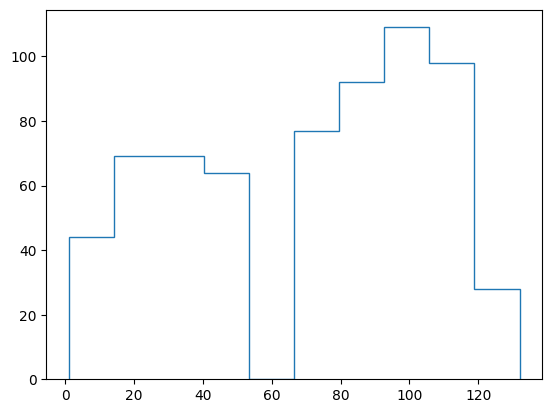

In [14]:
plt.hist(tree['hit_mpmt_card_ids'].array()[0], histtype='step');

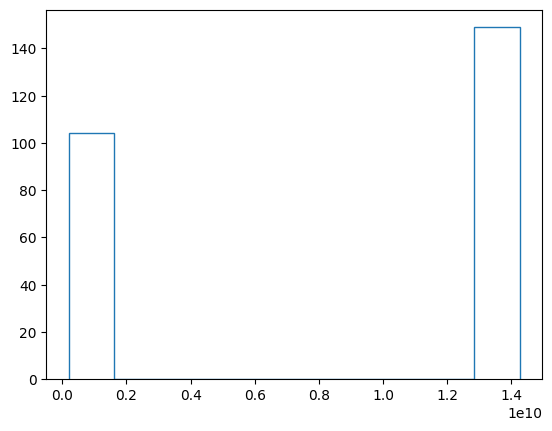

In [15]:
window_time = tree['window_time'].array() 
plt.hist(window_time, histtype='step');

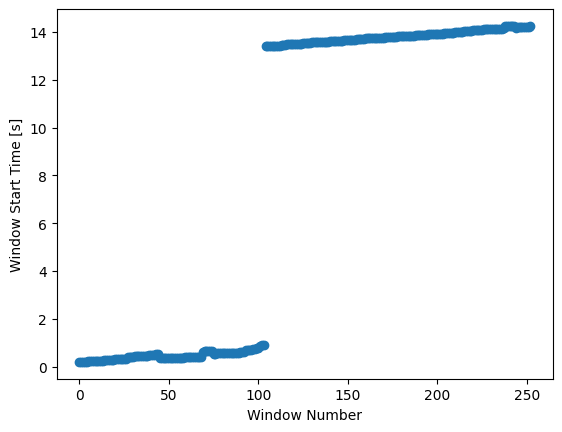

In [19]:
x = np.arange(0, len(window_time), 1)
plt.scatter(x, window_time*1e-9);
plt.xlabel("Window Number");
plt.ylabel("Window Start Time [s]");

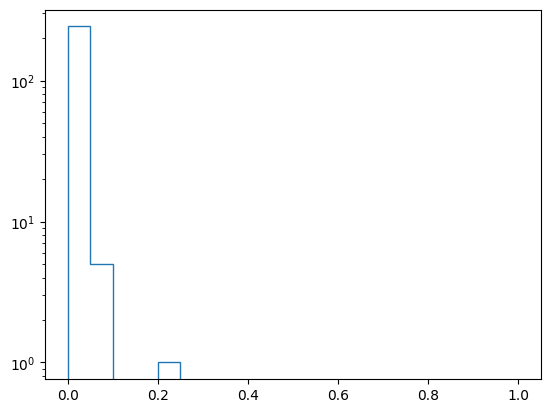

In [39]:
time_diff = []
for i in range(len(window_time)-1):
    time_diff.append(window_time[i+1]*1e-9 - window_time[i]*1e-9)
    
plt.hist(time_diff, histtype='step', bins=20, range=(0, 1));
plt.yscale('log')

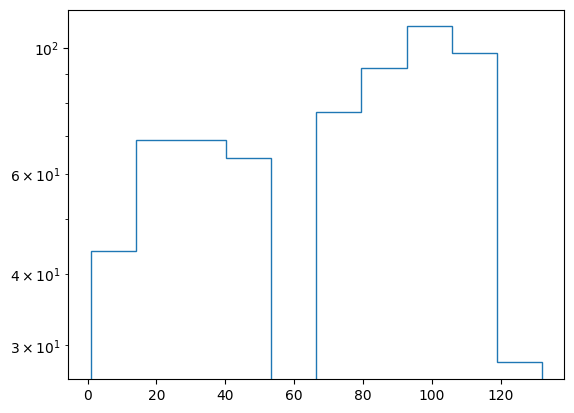

In [40]:
plt.hist(tree['hit_mpmt_card_ids'].array()[0], histtype='step');
plt.yscale('log')

In [42]:
counter = 0
for array in tree.iterate(['event_number', 'hit_mpmt_card_ids'][:2], step_size='1 MB'):
    print(array)
#     # Broadcast the number of events to match the number of hits in every window
#     event_id_batch, card_id_batch = ak.broadcast_arrays(array['event_number'], array['hit_mpmt_card_ids'])
    
#     # DEBUG: Histogram that shows card_id for every batch
#     plt.hist(card_id_batch[0], alpha=0.4, bins=50, label=f"Batch #{counter}")
#     plt.yscale('log')
#     plt.xlabel('Card ID')
#     plt.legend(loc="upper right")
    
#     # DEBUG
#     print(f"Batch {counter}: ")
#     print("event_id_batch:")
#     print(event_id_batch)
#     print("card_id_batch:")
#     print(card_id_batch)
    
#      # Print summary info
#     print(f"Batch of windows {ak.min(array['event_number'])} to {ak.max(array['event_number'])} has {ak.sum(ak.num(card_id_batch))} hits (average {ak.mean(ak.num(card_id_batch))} hits per window)\n")
    
#     # Update hist with event and card_id info and batch counter
#     counter += 1

[{event_number: 0, hit_mpmt_card_ids: [1312, ..., 0]}, {...}, ..., {...}, {...}]
[{event_number: 13192, hit_mpmt_card_ids: [75, ..., 44]}, {...}, ..., {...}]
[{event_number: 26384, hit_mpmt_card_ids: [100, ...]}, {...}, ..., {...}, {...}]
[{event_number: 39576, hit_mpmt_card_ids: [75, ..., 21]}, {...}, ..., {...}]
